# Plots for Gen2 call

### Dec 18, 2020

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
import pyrex.custom.ara as ara


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


In [3]:
# appended_data = []
# import os
# for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/noiseOn/window/"):#Loop over desired directory
#         if (filename.startswith("pol_quant_noise_")): #extension, .root in this case
#             name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/noiseOn/window/", str(filename))
#             data = pd.read_pickle(name)
#             appended_data.append(data)
# recoNu = pd.concat(appended_data) 

In [4]:
# saturated = recoNu.loc[abs(recoNu.maxV>1450)]
# saturated.groupby(['energyArr']).size()/recoNu.groupby(['energyArr']).size()
# saturated.groupby(['energyArr']).size()

## Events debugging

In [146]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/noiseOn/window_Sol0_2/"):#Loop over desired directory
        if (filename.startswith("pol_quant_noise_")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/noiseOn/window_Sol0_2/", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu = pd.concat(appended_data) 
# recoNu = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/debug/pol_quant_noiseless.pkl")
recoNu = recoNu.loc[abs(recoNu.maxV>1)]
recoNu = recoNu.loc[abs(recoNu.maxV<1450)]
recoNu = recoNu.loc[abs(recoNu.maxH>1)]
recoNu = recoNu.loc[abs(recoNu.maxH<1450)]
recoNu = recoNu.loc[recoNu.theta_reco>=np.pi/2]
# recoNu = recoNu.loc[recoNu.weight>1E-100]
recoNu["SNR_V"] = recoNu.maxV/recoNu.rmsV
recoNu["SNR_H"] = recoNu.maxH/recoNu.rmsH
# recoNu = recoNu.loc[abs(recoNu.SNR_H-5)<1]
# recoNu = recoNu.loc[recoNu.SNR_H>5]
# recoNu = recoNu.loc[recoNu.SNR_V>5]



array2 = []
R_True = []
R_Reco = []
propVec = []
dot = []
for i in recoNu.itertuples(): 
    thetaHat = np.array([np.cos(i.theta_reco)*np.cos(i.phi_reco), np.cos(i.theta_reco)*np.sin(i.phi_reco), -np.sin(i.theta_reco)])
    phiHat = np.array([-np.sin(i.phi_reco), np.cos(i.phi_reco),0])
    if(i.powerH==0 or i.powerV==0):
        R_Reco.append(np.nan)
        R_True.append(np.nan)
        array2.append(np.nan)
        dot.append(np.nan)
        continue
    R_Reco.append(np.sqrt(i.powerH/i.powerV))
#     R_Reco.append(abs(i.peak_H/i.peak_V))
    R = np.dot(i.PolTrue,phiHat)/(np.dot(i.PolTrue,thetaHat))
    R_True.append(R)
#     array2.append(util.PolVectorRecoPower_debug(i.powerV,i.powerH, i.theta_reco, i.phi_reco,np.sign(R)))
    array2.append(util.PolVectorReco_debug(i.peak_V,i.peak_H, i.theta_reco, i.phi_reco,np.sign(R)))

    propVec = np.array([np.sin(i.theta_reco)*np.cos(i.phi_reco),np.sin(i.theta_reco)*np.sin(i.phi_reco),np.cos(i.theta_reco)])
    dot.append(np.dot(propVec,i.PolTrue))
recoNu["PolReco2"] = array2
# recoNu["PolReco2"] = util.PolVectorReco(recoNu.maxV, recoNu.maxH, recoNu.theta_reco,recoNu.phi_reco)

recoNu["R_True"] = R_True
recoNu["R_Reco"] = R_Reco
recoNu["dotProd"] = dot
recoNu = recoNu.dropna()

# recoNu = recoNu.loc[abs(np.degrees(recoNu.view_ang)-56.037)<5]


Px_true = np.array([element[0] for element in recoNu.PolTrue])
Py_true = np.array([element[1] for element in recoNu.PolTrue])
Pz_true = np.array([element[2] for element in recoNu.PolTrue])

Px_reco = np.array([element[0] for element in recoNu.PolReco2])
Py_reco = np.array([element[1] for element in recoNu.PolReco2])
Pz_reco = np.array([element[2] for element in recoNu.PolReco2])


thetaPol_true = np.degrees(np.arccos(abs(Pz_true)))
thetaPol_reco = np.degrees(np.arccos(abs(Pz_reco)))
phiPol_true = np.degrees(np.arctan2(abs(Py_true),abs(Px_true)))
phiPol_reco = np.degrees(np.arctan2(abs(Py_reco),abs(Px_reco)))



recoNu["delta"] = thetaPol_reco-thetaPol_true
recoNu["deltaPhi"] = phiPol_reco-phiPol_true
# recoNu.loc[np.sign(recoNu.R_True)-recoNu.R_recoSign==0]

recoNu = recoNu.loc[abs(recoNu.R_Reco-recoNu.R_True)<1]

# delta = thetaPol_reco-thetaPol_true
# deltaPhi = phiPol_reco-phiPol_true
recoNu = recoNu.dropna()
# delta = delta[~np.isnan(delta)]


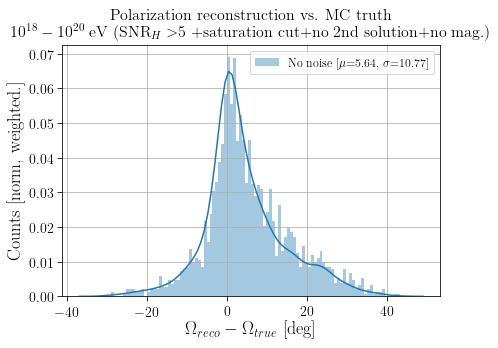

In [138]:
delta = recoNu["delta"]
plt.figure(figsize=(7,5))
delta_mean= np.ma.average(delta,weights=recoNu.weight)
variance = np.dot(recoNu.weight, (delta - delta_mean) ** 2) / recoNu.weight.sum()
delta_std = np.sqrt(variance)

sns.distplot(delta, bins=100,hist_kws={'weights': recoNu.weight},norm_hist=False,label = "No noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

# delta_std = recoNu_noise.deltaTheta.std()
# delta_mean = recoNu_noise.deltaTheta.mean()
# plt.hist(recoNu_noise.deltaTheta, bins=500, density=True, alpha=0.5, color="C1",label = "W/noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

plt.xlabel("$\Omega_{reco}-\Omega_{true}$ [deg]")
# plt.xlabel("$\\theta$")
plt.ylabel('Counts [norm, weighted.]')
# plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{21}$ eV events (no cuts)")
plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{20}$ eV (SNR$_{H}>$5 +saturation cut+no 2nd solution+no mag.)", fontsize=16)
# plt.xlim(-20,20)
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_noNoiseOmega.png', dpi=250)


mean: 2.958, variance: 7.169


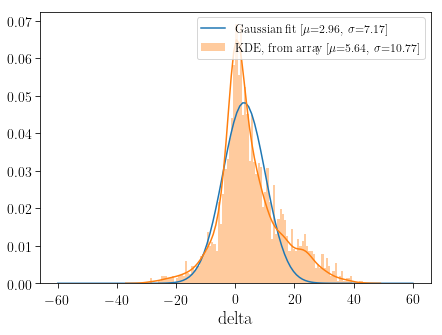

In [139]:
plt.figure(figsize=(7,5))

delta_mean = np.ma.average(delta,weights=recoNu.weight)
variance = np.dot(recoNu.weight, (delta - delta_mean) ** 2) /recoNu.weight.sum()
delta_std = np.sqrt(variance)
data_entries_Om, bins_Om = np.histogram(delta, bins=100, weights=recoNu.weight, density=True)
binscenters_Om = np.array([0.5 * (bins_Om[i] + bins_Om[i+1]) for i in range(len(bins_Om)-1)])
poptOm, pcov = curve_fit(gauss, xdata=binscenters_Om, ydata=data_entries_Om)
perr_Om = np.sqrt(np.diag(pcov))
print("mean: %0.3f, variance: %0.3f"%(poptOm[1],poptOm[2]))
x = np.linspace(-60,60,120)
plt.plot(x,gauss(x,poptOm[0],poptOm[1],poptOm[2]), label="Gaussian fit [$\mu$=%0.2f, $\sigma$=%0.2f]"%(poptOm[1],poptOm[2]))
sns.distplot(delta, bins=100,hist_kws={'weights': recoNu.weight},norm_hist=False,label = "KDE, from array [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));
plt.legend()
# sns.distplot(delta, bins=100,hist_kws={'weights': recoNu.weight},norm_hist=False,label = "KDE, from array [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));



In [50]:
import scipy.stats as st

#define sample data
np.random.seed(0)
data = np.random.randint(10, 30, 50)

#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.68, loc=poptOm[1], scale=poptOm[2])

NameError: name 'poptOm' is not defined

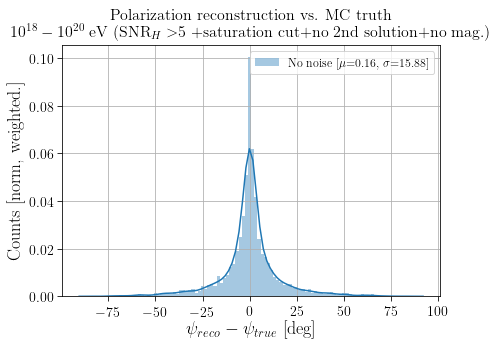

In [70]:
plt.figure(figsize=(7,5))
deltaPhi = recoNu["deltaPhi"]
# plt.hist(recoNu.AngStokes-np.degrees(np.arccos(abs(recoNu.pol_z))), bins=100, density=False, alpha=1);
delta_mean = np.ma.average(deltaPhi,weights=recoNu.weight)
variance = np.dot(recoNu.weight, (deltaPhi - delta_mean) ** 2) / recoNu.weight.sum()
delta_std = np.sqrt(variance)
sns.distplot(deltaPhi, hist_kws={'weights': recoNu.weight},bins=100,label = "No noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

# delta_std = recoNu_noise.deltaTheta.std()
# delta_mean = recoNu_noise.deltaTheta.mean()
# plt.hist(recoNu_noise.deltaTheta, bins=500, density=True, alpha=0.5, color="C1",label = "W/noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

plt.xlabel("$\psi_{reco}-\psi_{true}$ [deg]")
# plt.xlabel("$\\theta$")
plt.ylabel('Counts [norm, weighted.]')
# plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{21}$ eV events (no cuts)")
plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{20}$ eV (SNR$_{H}>$5 +saturation cut+no 2nd solution+no mag.)", fontsize=16)
# plt.xlim(-20,20)

# plt.yscale("log")
# mplcyberpunk.add_glow_effects()
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_noNoisePsi.png', dpi=250)


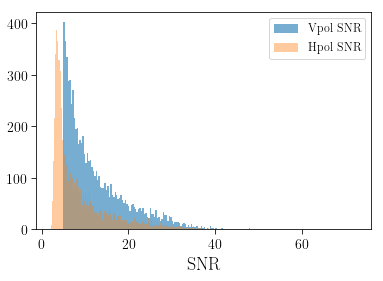

In [71]:
plt.hist(recoNu.SNR_V,bins=200,alpha = 0.6, label="Vpol SNR");
plt.hist(recoNu.SNR_H,bins=200, alpha = 0.4,label="Hpol SNR");
plt.xlabel("SNR")
plt.legend()
# print(recoNu.rmsH.mean())
# plt.xlim(0,5)

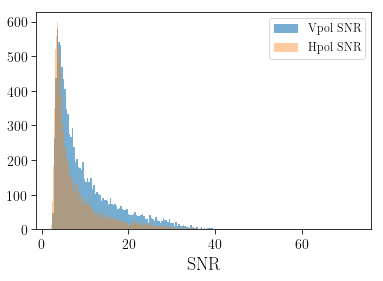

In [66]:
plt.hist(recoNu.SNR_V,bins=200,alpha = 0.6, label="Vpol SNR");
plt.hist(recoNu.SNR_H,bins=200, alpha = 0.4,label="Hpol SNR");
plt.xlabel("SNR")
plt.legend()
# print(recoNu.rmsH.mean())
# plt.xlim(0,5)

## Stuff as a function of SNR

In [72]:
from scipy.optimize import curve_fit

# scipy.stats.norm.fit(delta)
def gauss(x,A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
bins=100


In [73]:
mean = [[],[],[]]
mean_err = [[],[]]
resolution = [[],[],[]]
resolution_err = [[],[],[]]
meanH = [[],[],[]]
meanH_err = [[],[]]
resolutionH = [[],[],[]]
resolutionH_err = [[],[],[]]
for SNR in np.arange(5,30,1):
    SNR_recoNu = recoNu.loc[abs(recoNu.SNR_V-SNR)<=1]
    delta = SNR_recoNu.delta
    deltaPhi = SNR_recoNu.deltaPhi
    delta_mean = np.ma.average(delta,weights=SNR_recoNu.weight)
    variance = np.dot(SNR_recoNu.weight, (delta - delta_mean) ** 2) / SNR_recoNu.weight.sum()
    delta_std = np.sqrt(variance)
    
    data_entries_Om, bins_Om = np.histogram(delta, bins=bins, weights=SNR_recoNu.weight, density=True)
    binscenters_Om = np.array([0.5 * (bins_Om[i] + bins_Om[i+1]) for i in range(len(bins_Om)-1)])
    poptOm, pcov = curve_fit(gauss, xdata=binscenters_Om, ydata=data_entries_Om)
    perr_Om = np.sqrt(np.diag(pcov))   
    mean_err[0].append(perr_Om[1])
    resolution_err[0].append(perr_Om[2])

    data_entries_Psi, bins_Psi = np.histogram(deltaPhi, bins=bins, weights=SNR_recoNu.weight, density=True)
    binscenters_Psi = np.array([0.5 * (bins_Psi[i] + bins_Psi[i+1]) for i in range(len(bins_Psi)-1)])
    poptPsi, pcov = curve_fit(gauss, xdata=binscenters_Psi, ydata=data_entries_Psi)
    perr_Psi = np.sqrt(np.diag(pcov))    
    mean_err[1].append(perr_Psi[1])
    resolution_err[1].append(perr_Psi[2])
    
    deltaPhi_mean = np.ma.average(deltaPhi,weights=SNR_recoNu.weight)
    variancePhi = np.dot(SNR_recoNu.weight, (deltaPhi - deltaPhi_mean) ** 2) / SNR_recoNu.weight.sum()
    deltaPhi_std = np.sqrt(variancePhi)
    
    resolution[0].append(SNR)
#     resolution[1].append(delta_std)
#     resolution[2].append(deltaPhi_std)
    resolution[1].append(poptOm[2])
    resolution[2].append(poptPsi[2])
    
    mean[0].append(SNR)
#     mean[1].append(delta_mean)
#     mean[2].append(deltaPhi_mean)
    
    mean[1].append(poptOm[1])
    mean[2].append(poptPsi[1])
    
for SNR in np.arange(5,30,0.5):
    SNR_recoNu = recoNu.loc[abs(recoNu.SNR_H-SNR)<=1]
    delta = SNR_recoNu.delta
    deltaPhi = SNR_recoNu.deltaPhi
    
    delta_mean = np.ma.average(delta,weights=SNR_recoNu.weight)
    variance = np.dot(SNR_recoNu.weight, (delta - delta_mean) ** 2) / SNR_recoNu.weight.sum()
    delta_std = np.sqrt(variance)
    
    deltaPhi_mean = np.ma.average(deltaPhi,weights=SNR_recoNu.weight)
    variancePhi = np.dot(SNR_recoNu.weight, (deltaPhi - deltaPhi_mean) ** 2) / SNR_recoNu.weight.sum()
    deltaPhi_std = np.sqrt(variancePhi)
    
    data_entries_Om, bins_Om = np.histogram(delta, bins=bins, weights=SNR_recoNu.weight, density=True)
    binscenters_Om = np.array([0.5 * (bins_Om[i] + bins_Om[i+1]) for i in range(len(bins_Om)-1)])
    poptOm, pcov = curve_fit(gauss, xdata=binscenters_Om, ydata=data_entries_Om)
    perr_Om = np.sqrt(np.diag(pcov))   
    meanH_err[0].append(perr_Om[1])
    resolutionH_err[0].append(perr_Om[2])
    
    data_entries_Psi, bins_Psi = np.histogram(deltaPhi, bins=bins, weights=SNR_recoNu.weight, density=True)
    binscenters_Psi = np.array([0.5 * (bins_Psi[i] + bins_Psi[i+1]) for i in range(len(bins_Psi)-1)])
    poptPsi, pcov = curve_fit(gauss, xdata=binscenters_Psi, ydata=data_entries_Psi)
    perr_Psi = np.sqrt(np.diag(pcov))    
    meanH_err[1].append(perr_Psi[1])
    resolutionH_err[1].append(perr_Psi[2])
    
    resolutionH[0].append(SNR)
#     resolutionH[1].append(delta_std)
#     resolutionH[2].append(deltaPhi_std)
    resolutionH[1].append(poptOm[2])
    resolutionH[2].append(poptPsi[2])
    
    meanH[0].append(SNR)
#     meanH[1].append(delta_mean)
#     meanH[2].append(deltaPhi_mean)
#     print(deltaPhi_mean)
    meanH[1].append(poptOm[1])
    meanH[2].append(poptPsi[1])
    

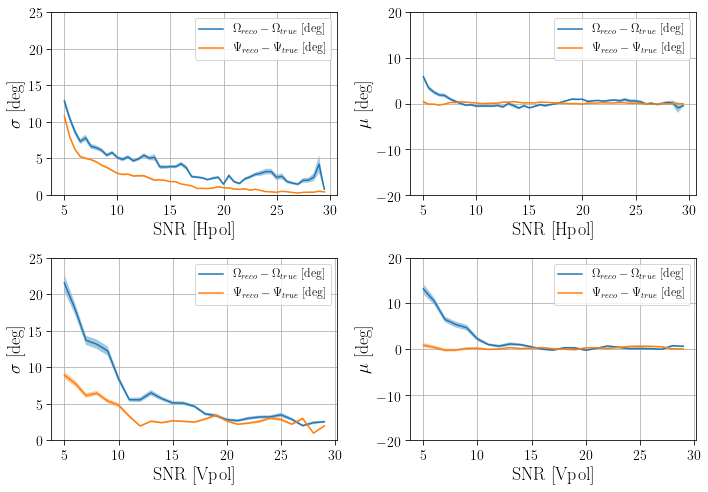

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes[0,0].plot(resolutionH[0],resolutionH[1], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[0,0].fill_between(resolutionH[0],resolutionH[1]+np.array(resolutionH_err[0]),resolutionH[1]-np.array(resolutionH_err[0]),alpha=0.4)
axes[0,0].plot(resolutionH[0],resolutionH[2], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[0,0].fill_between(resolutionH[0],resolutionH[2]+np.array(resolutionH_err[1]),resolutionH[2]-np.array(resolutionH_err[1]),alpha=0.4)
axes[0,0].set_xlabel("SNR [Hpol]")
axes[0,0].set_ylabel("$\sigma$ [deg]")
axes[0,0].legend()
axes[0,0].grid()
axes[0,0].set_ylim(0,25)


axes[0,1].plot(meanH[0],meanH[1], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[0,1].fill_between(meanH[0],meanH[1]+np.array(meanH_err[0]),meanH[1]-np.array(meanH_err[0]),alpha=0.4)
axes[0,1].plot(meanH[0],meanH[2], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[0,1].fill_between(meanH[0],meanH[2]+np.array(meanH_err[1]),meanH[2]-np.array(meanH_err[1]),alpha=0.4)
axes[0,1].set_xlabel("SNR [Hpol]")
axes[0,1].set_ylabel("$\mu$ [deg]")
axes[0,1].legend()
axes[0,1].grid()
axes[0,1].set_ylim(-20,20)


axes[1,0].plot(resolution[0],resolution[1], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[1,0].fill_between(resolution[0],resolution[1]+np.array(resolution_err[0]),resolution[1]-np.array(resolution_err[0]),alpha=0.4)
axes[1,0].plot(resolution[0],resolution[2], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[1,0].fill_between(resolution[0],resolution[2]+np.array(resolution_err[1]),resolution[2]-np.array(resolution_err[1]),alpha=0.4)
axes[1,0].set_xlabel("SNR [Vpol]")
axes[1,0].set_ylabel("$\sigma$ [deg]")
axes[1,0].legend()
axes[1,0].grid()
axes[1,0].set_ylim(0,25)


axes[1,1].plot(mean[0],mean[1], label="$\Omega_{reco}-\Omega_{true}$ [deg]")
axes[1,1].fill_between(mean[0],mean[1]+np.array(mean_err[0]),mean[1]-np.array(mean_err[0]),alpha=0.4)
axes[1,1].plot(mean[0],mean[2], label="$\Psi_{reco}-\Psi_{true}$ [deg]")
axes[1,1].fill_between(mean[0],mean[2]+np.array(mean_err[1]),mean[2]-np.array(mean_err[1]),alpha=0.4)
axes[1,1].set_xlabel("SNR [Vpol]")
axes[1,1].set_ylabel("$\mu$ [deg]")
axes[1,1].legend()
axes[1,1].grid()
axes[1,1].set_ylim(-20,20)

fig.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/SNR_scan_ratioPowerWindowed_RecoSign.png', dpi=250)

## Loop over SNR bins and plot distributions

### Omega

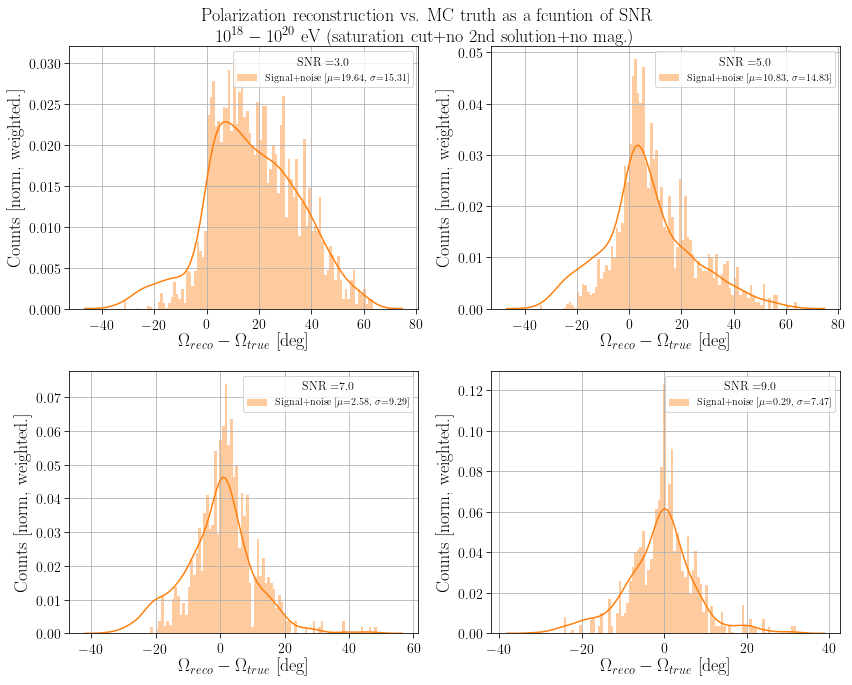

In [28]:
fig, axs = plt.subplots(2, 2, figsize = (12,10))
axs = axs.ravel()
panel=0
for SNR in np.arange(3,10,2):
    SNR_recoNu = recoNu.loc[abs(recoNu.SNR_H-SNR)<=1]
    delta = SNR_recoNu.delta
    deltaPhi = SNR_recoNu.deltaPhi
    
#     plt.figure(figsize=(7,5))
    delta_mean = np.ma.average(delta,weights=SNR_recoNu.weight)
    variance = np.dot(SNR_recoNu.weight, (delta - delta_mean) ** 2) / SNR_recoNu.weight.sum()
    delta_std = np.sqrt(variance)
    sns.distplot(delta, bins=100,color="C1",hist_kws={'weights': SNR_recoNu.weight},norm_hist=False,label = "Signal+noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std),ax = axs[panel]);

    axs[panel].set_xlabel("$\Omega_{reco}-\Omega_{true}$ [deg]")
    axs[panel].set_ylabel('Counts [norm, weighted.]')
    # plt.xlim(-20,20)

    axs[panel].grid()
    axs[panel].legend(title="SNR =%0.1f "%SNR, fontsize=10)
    panel=panel+1

fig.suptitle("Polarization reconstruction vs. MC truth as a fcuntion of SNR \n $10^{18}-10^{20}$ eV (saturation cut+no 2nd solution+no mag.)", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_noNoiseOmega_SNR.png', dpi=250)


## Psi

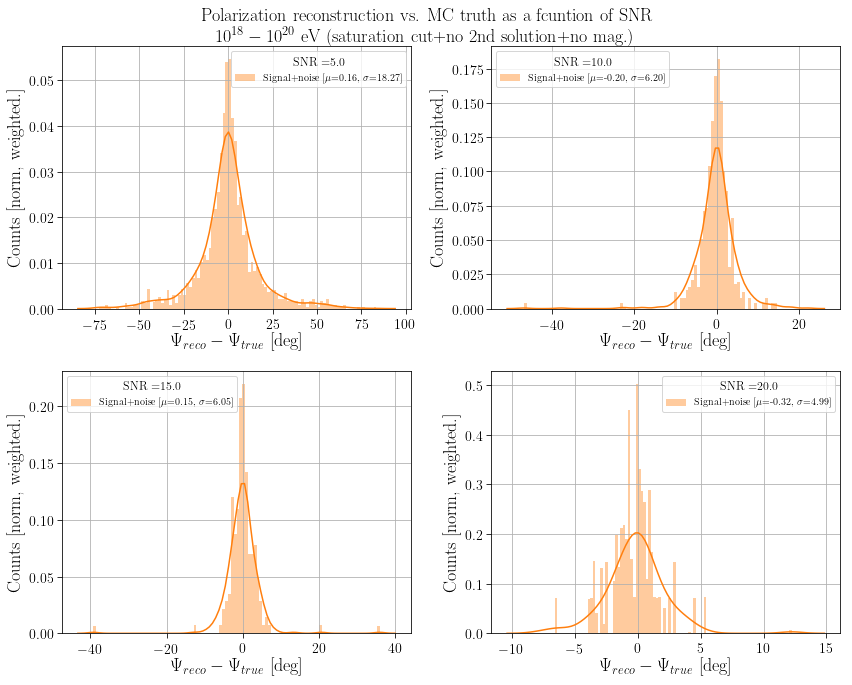

In [29]:
fig, axs = plt.subplots(2, 2, figsize = (12,10))
axs = axs.ravel()
panel=0
for SNR in np.arange(5,25,5):
    SNR_recoNu = recoNu.loc[abs(recoNu.SNR_H-SNR)<=1]
    delta = SNR_recoNu.delta
    deltaPhi = SNR_recoNu.deltaPhi
    
#     plt.figure(figsize=(7,5))
    delta_mean = np.ma.average(deltaPhi,weights=SNR_recoNu.weight)
    variance = np.dot(SNR_recoNu.weight, (delta - delta_mean) ** 2) / SNR_recoNu.weight.sum()
    delta_std = np.sqrt(variance)
    sns.distplot(deltaPhi, bins=100,color="C1",hist_kws={'weights': SNR_recoNu.weight},norm_hist=False,label = "Signal+noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std),ax = axs[panel]);

    axs[panel].set_xlabel("$\Psi_{reco}-\Psi_{true}$ [deg]")
    axs[panel].set_ylabel('Counts [norm, weighted.]')
#     axs[panel].title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{20}$ eV (SNR$_H>$%0.1f+saturation cut+no 2nd solution+no mag.)"%SNR, fontsize=16)
    # plt.xlim(-20,20)

    axs[panel].grid()
    axs[panel].legend(title="SNR =%0.1f "%SNR, fontsize=10)
    panel=panel+1
fig.suptitle("Polarization reconstruction vs. MC truth as a fcuntion of SNR \n $10^{18}-10^{20}$ eV (saturation cut+no 2nd solution+no mag.)", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_noNoisePsi_SNR.png', dpi=250)


In [30]:
find = recoNu.loc[(abs(recoNu.delta)>25) & (recoNu.SNR_H>10)]
find = find.drop(columns = ['theta_reco', 'PolReco', 'rmsV', 'rmsH','maxV', 'maxH', 'powerV', 'powerH','dotProd'
                           ,'SNR_V', 'SNR_H', 'PolReco2', 'R_True',
       'R_Reco',])
# find.loc[find.EvNum == 4355]
find

,EvNum,phi_reco,PolTrue,energyArr,batch,weight,view_ang,R_recoSign,peak_V,peak_H,delta,deltaPhi
51,4434,2.620215,"[-0.49888723072847957, -0.2507770621276848, 0....",20.0,0,9.896214e-01,0.804018,-1.0,3380.249483,-5218.313172,25.410455,20.745157
93,10640,0.021873,"[0.48445024930230635, -0.6005622430364804, 0.6...",19.0,15,9.405559e-01,0.808325,-1.0,1847.043934,-9456.470370,30.641089,31.006991
747,91299,3.530297,"[-0.3783439842985375, 0.9256603490243586, -0.0...",19.0,43,1.271919e-05,1.071005,-1.0,2278.281226,-3659.003048,-30.794879,8.078928
354,42392,2.973458,"[0.49998009002342725, 0.6432611451924657, -0.5...",19.0,10,1.256336e-27,1.138477,-1.0,1696.812190,-10940.516003,28.106583,23.317212
750,90036,3.236501,"[0.10433576075160321, -0.9926642643779728, -0....",19.0,47,4.019985e-07,0.958285,-1.0,-1929.186071,3446.563228,-25.331565,-4.502334
419,31380,0.325147,"[-0.3168830825661223, 0.9482480602610563, 0.02...",20.0,9,3.298874e-06,1.045807,1.0,2539.420706,4767.432137,-26.626530,3.779385
890,65657,4.953055,"[-0.23824621684682085, -0.6690294380314576, 0....",20.0,39,9.414122e-01,0.849940,-1.0,3668.260009,-7542.694810,25.207223,-39.214037
1239,93034,4.006432,"[0.24965115269124008, -0.11796405081398857, -0...",20.0,5,1.203850e-141,1.053178,1.0,5293.079553,4658.056035,25.502581,10.291865


In [42]:
recoNu.loc[recoNu.EvNum == 35936]

,EvNum,theta_reco,phi_reco,PolTrue,PolReco,rmsV,rmsH,maxV,maxH,powerV,...,view_ang,R_recoSign,SNR_V,SNR_H,PolReco2,R_True,R_Reco,dotProd,delta,deltaPhi
33,35936,1.664542,5.832486,"[-0.3719215340842435, -0.8493874645084342, 0.3...","[0.43213278414416717, 0.8054326564974437, 0.40...",41.659999,44.854147,322.556906,525.935557,1.651992e+07,...,0.995344,-1.0,7.742605,11.725461,"[-0.002151373629053536, -0.21523289500390405, ...",2.463614,0.198475,-1.541133e-09,-55.579648,23.074498


In [39]:
def makeInputFile(posnu_x, posnu_y, posnu_z, nnu_x, nnu_y, nnu_z, nuflavorint, nu_nubar, pnu, currentint, elast_y):
    """
    Make input file to be read by AraSim (only works if using A2). It's very rudimentary, but it works.
    Author: Jorge Torres, Dec 3.
    Parameters
    ----------
    All the inputs are given in AraSim output coordinates/units.
    Returns
    -------
    Prints something that can be copied and pasted as an input file.
    """
    #posnu
    posNu = np.array([posnu_x, posnu_y, posnu_z])
    avgVec = np.array([10000.83568, 9998.89765, 6359452.44702])
    posNu2 = posNu-avgVec #AraSim adds avgVec when transforming coordinates, and this is what AraSim outputs
    norm = np.linalg.norm(posNu2)
    posNu2 = posNu2/norm#Normalize
    posnu_r = norm
    
    posnu_theta = np.pi/2-np.arccos(posNu2[2])
    posnu_phi = np.arctan2(posNu2[1],posNu2[0])%(2*np.pi)

    #nnu
    nnu = np.array([nnu_x, nnu_y, nnu_z])
    nnu_phi = np.arctan2(nnu[1],nnu[0])%(2*np.pi)
    nnu_theta = np.arccos(nnu[2])
    print("//VERSION=0.1\n//EVENT_NUM=" + str(1) + 
          "\n//evid nuflavorint nu_nubar pnu currentint posnu_r posnu_theta posnu_phi nnu_theta nnu_phi elast_y")
    print("{:08d} {:01d} {:01d} {:.3f} {:01d} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}\n".format(1, 
        int(nuflavorint), int(nu_nubar), pnu, int(currentint), posnu_r, posnu_theta, posnu_phi, nnu_theta, nnu_phi, elast_y))

In [40]:
makeInputFile(11612.306460323045, 9210.735953468713, 6359094.593712009,-0.20113365849504938, 0.961068840452792, -0.18945167017242898,1,1,18.0,1,0.024800)

//VERSION=0.1
//EVENT_NUM=1
//evid nuflavorint nu_nubar pnu currentint posnu_r posnu_theta posnu_phi nnu_theta nnu_phi elast_y
00000001 1 1 18.000 1 1829.2337 -0.1969 5.8283 1.7614 1.7771 0.0248



(0, 40)

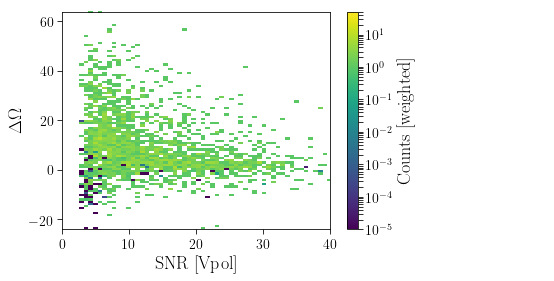

In [147]:
plt.hist2d(recoNu.SNR_V,recoNu["delta"], bins=100, norm=mpl.colors.LogNorm(vmin=1E-5,vmax=50),weights=recoNu.weight);
plt.colorbar(label="Counts [weighted]")
plt.xlabel("SNR [Vpol]")
plt.ylabel("$\Delta\Omega$")
# plt.ylim(-100,100)
plt.xlim(0,40)

(0, 40)

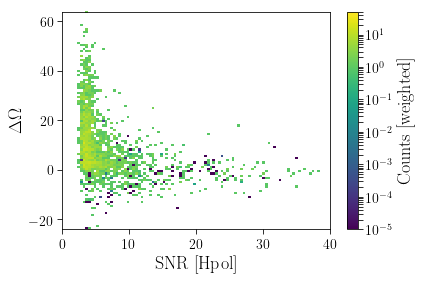

In [148]:
plt.hist2d(recoNu.SNR_H,recoNu["delta"], bins=100, norm=mpl.colors.LogNorm(vmin=1E-5,vmax=50),weights=recoNu.weight);
plt.colorbar(label="Counts [weighted]")
plt.xlabel("SNR [Hpol]")
plt.ylabel("$\Delta\Omega$")
# plt.ylim(-100,100)
plt.xlim(0,40)

In [175]:
recoNu.columns

Index(['EvNum', 'theta_reco', 'phi_reco', 'PolTrue', 'PolReco', 'rmsV', 'rmsH',
       'maxV', 'maxH', 'powerV', 'powerH', 'energyArr', 'batch', 'weight',
       'view_ang', 'R_recoSign', 'SNR_V', 'SNR_H', 'PolReco2', 'R_True',
       'R_Reco', 'dotProd', 'delta', 'deltaPhi'],
      dtype='object')

In [47]:
x = np.linspace(0,1,100)
y = np.degrees(np.arccos(1/np.sqrt(1+x**2)))

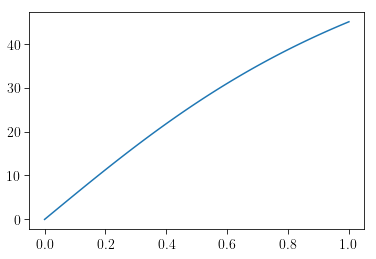

In [48]:
plt.plot(x,y)